In [992]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [993]:
image= cv2.imread('E:/CollegeMatrial/DIP/_Output/Arjun_(P1)/0002_0001.JPG')

In [994]:
#Histogram

Text(0.5, 1.0, 'HISTOGRAM')

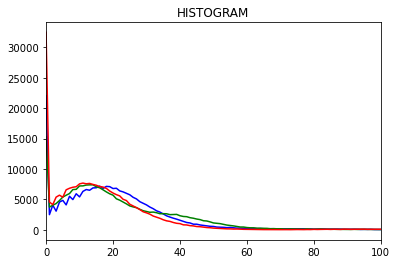

In [995]:
color=('b' ,'g' ,'r')

for i, col in enumerate(color):
    hist = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,100])
   # plt.Ylim([0,500000])
plt.title('HISTOGRAM')

In [996]:
image1 = np.zeros(image.shape,image.dtype)

In [997]:
contrast=5
bright =2

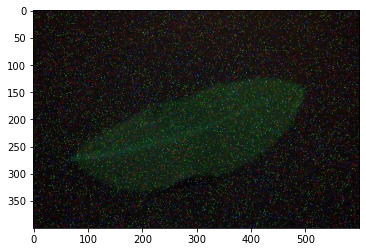

In [998]:
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            image1[y,x,c]=np.clip(contrast*image[y,x,c]+bright , 0 ,255)
            
plt.imshow(image)


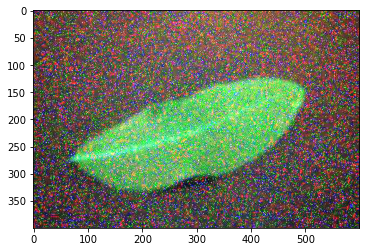

In [999]:
plt.imshow(image1)


Text(0.5, 1.0, 'HISTOGRAM')

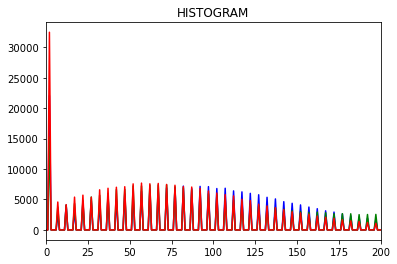

In [1000]:
color=('b' ,'g' ,'r')

for i, col in enumerate(color):
    hist = cv2.calcHist([image1],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,200])
   # plt.Ylim([0,500000])
plt.title('HISTOGRAM')

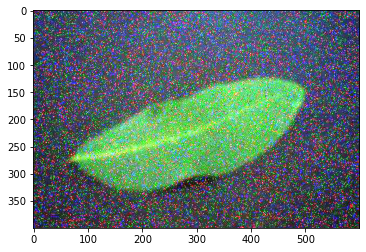

In [1001]:
img = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
#blur = cv2.blur(img,(3,3))

plt.imshow(img)

Text(0.5, 1.0, 'HISTOGRAM')

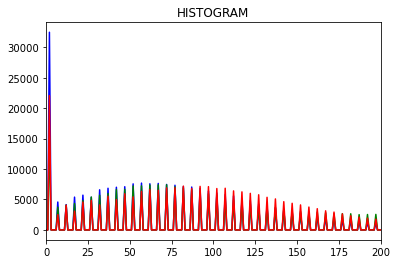

In [1002]:
color=('b' ,'g' ,'r')

for i, col in enumerate(color):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,200])
   # plt.Ylim([0,500000])
plt.title('HISTOGRAM')

In [1003]:
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

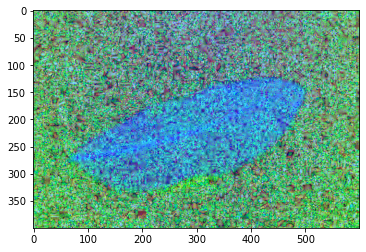

In [1004]:
plt.imshow(hsv)

In [1005]:
hsv_eq = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

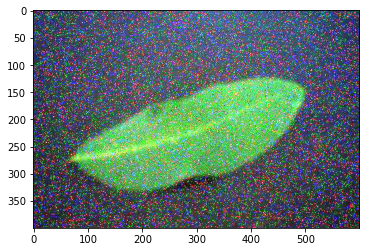

In [1006]:
plt.imshow(hsv_eq)

Text(0.5, 1.0, 'HISTOGRAM')

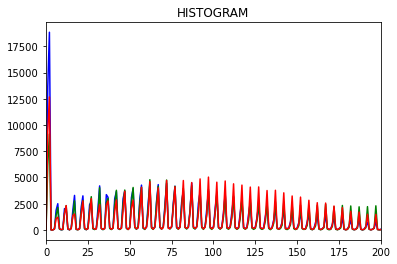

In [1007]:
color=('b' ,'g' ,'r')

for i, col in enumerate(color):
    hist = cv2.calcHist([hsv_eq],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,200])
   # plt.Ylim([0,500000])
plt.title('HISTOGRAM')

In [1008]:
#resized_image = cv2.resize(img, (600, 400))
#plt.imshow(resized_image)

In [1009]:
#resized_image.shape

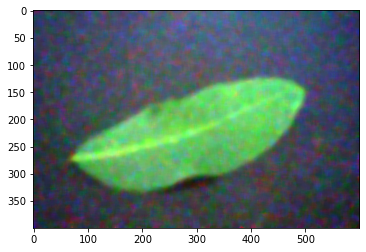

In [1010]:
## median filter
median = cv2.medianBlur(img,11)   #################
plt.imshow(median)

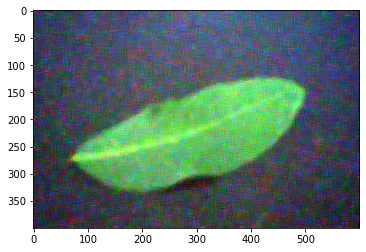

In [1011]:
sharpen_filter = np.array([[-1,-1,-1], 
                           [-1, 9,-1],
                           [-1,-1,-1]])
#sharpen_filter = np.array([[0,-1,-0], 
#                           [-1, 5,-1],
#                           [0,-1,-0]])

sharped_img = cv2.filter2D(median, -1, sharpen_filter)
plt.imshow(sharped_img,cmap='Greys_r')

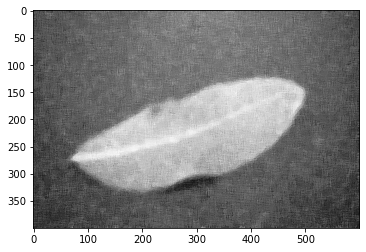

In [1012]:
gs = cv2.cvtColor(sharped_img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

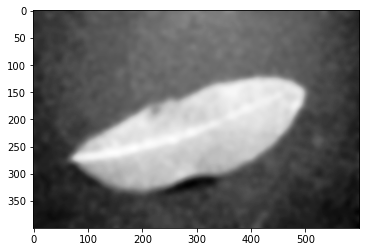

In [1013]:
blur = cv2.GaussianBlur(gs, (25,25),0)
plt.imshow(blur,cmap='Greys_r')

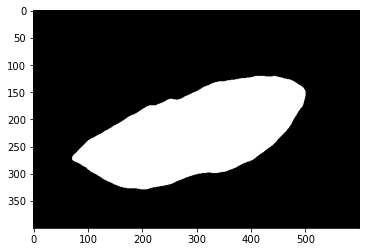

In [1014]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')


In [1015]:
#Morophlogical

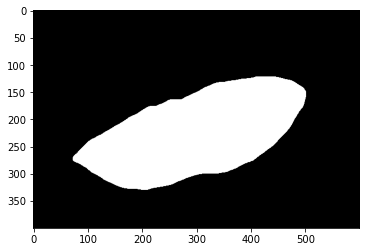

In [1016]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap="Greys_r")


In [1017]:
image_ground = cv2.imread('E:/CollegeMatrial/DIP/_Ground_Truth/_GroundTruth/Arjun_(P1)/0002_0001.JPG',0)

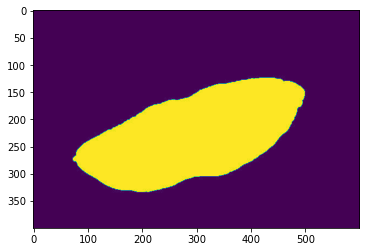

In [1018]:
plt.imshow(image_ground)


In [1019]:
import numpy as np

intersection = np.logical_and(closing, image_ground)
union = np.logical_or(closing, image_ground)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU is %s" % iou_score)

IoU is 0.9289769210363428


In [1020]:
#Class1 Arjun_(P1)

In [1021]:
import os 
import glob 

img_dir = "E:/CollegeMatrial/DIP/_Output/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Arjun_(P1)/*') 
files = glob.glob(data_path) 
images = [] 
for f1 in files: 
    img = cv2.imread(f1, 0) 
    images.append(img)

In [1022]:
len(images)


214

In [1023]:
###segmented images

img_dir = "E:/CollegeMatrial/DIP/_Ground_Truth/_GroundTruth/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Arjun_(P1)/*') 
files = glob.glob(data_path) 
segmented = [] 
for f1 in files: 
    img = cv2.imread(f1, 0) 
    segmented.append(img)

In [1024]:
len(segmented)


214

In [1025]:

th_data = []
for i in range(len(images)):
    img = cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB)
    #hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    #hsv_eq = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
    median = cv2.medianBlur(img,11,0)   #################
    sharpen_filter = np.array([[-1,-1,-1], 
                           [-1, 9,-1],
                           [-1,-1,-1]])

    sharped_img = cv2.filter2D(median, -1, sharpen_filter)
    gamma_transformation = np.array(255*(sharped_img / 255) ** 1.1, dtype = 'uint8')
    #for gamma in [5]:
    # Apply gamma correction.
     # gamma_transformation = np.array(255*(sharped_img / 255) ** gamma, dtype = 'uint8')
    gs = cv2.cvtColor(gamma_transformation,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)

    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    

    th_data.append(closing)

In [1026]:
iou_data = []
for i in range(len(th_data)):
    intersection = np.logical_and(th_data[i], segmented[i])
    union = np.logical_or(th_data[i], segmented[i])
    iou_score = np.sum(intersection) / np.sum(union)
    #print("IoU is %s" % iou_score)
    iou_data.append(iou_score)

In [1027]:
iou_data

[0.9284590221907877,
 0.9004186602870813,
 0.9215695952615992,
 0.8070066259106051,
 0.8959677654822039,
 0.8802782672094295,
 0.8407576003901804,
 0.8801206916560288,
 0.9140831838756512,
 0.9227938844128656,
 0.9144451145958987,
 0.8800503827148533,
 0.022381394070562367,
 0.01434321935871929,
 0.8544324501144913,
 0.9149326580791955,
 0.9202626043724903,
 0.9060438183792211,
 0.9076391554702495,
 0.9078799249530957,
 0.8903905964141968,
 0.9225740056904171,
 0.9500673989732412,
 0.8904123101203393,
 0.8969009295363406,
 0.8999030202272098,
 0.8873215416849388,
 0.8531590413943355,
 0.7255787148208626,
 0.8840336134453781,
 0.8978021978021978,
 0.9062197561132976,
 0.8749628160634606,
 0.8343120426416117,
 0.8882346756387342,
 0.9012566092151343,
 0.9056106633601984,
 0.8969517004593328,
 0.8408282218984039,
 0.906663560111836,
 0.9066698541716471,
 0.897562330717411,
 0.9123464770523594,
 0.9100881586856342,
 0.8916348693865571,
 0.9162397434295473,
 0.9077706684627042,
 0.886092846

In [1028]:
mean_iou = sum(iou_data)/len(iou_data)
print(mean_iou) 

0.8423038961609806


In [1029]:
#class Basil_(P8)

In [1030]:
import os 
import glob 

img_dir = "E:/CollegeMatrial/DIP/_Output/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Basil_(P8)/*') 
files = glob.glob(data_path) 
images = [] 
for f1 in files: 
    img = cv2.imread(f1, 0) 
    images.append(img)

In [1031]:
len(images)


148

In [1032]:
###segmented images

img_dir = "E:/CollegeMatrial/DIP/_Ground_Truth/_GroundTruth/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Basil_(P8)/*') 
files = glob.glob(data_path) 
segmented = [] 
for f1 in files: 
    img = cv2.imread(f1, 0) 
    segmented.append(img)

In [1033]:
len(segmented)


148

In [1034]:

th_data = []
for i in range(len(images)):
    img = cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB)
    # hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    #hsv_eq = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
    median = cv2.medianBlur(img,9,0)   #################
    sharpen_filter = np.array([[-1,-1,-1], 
                           [-1, 9,-1],
                           [-1,-1,-1]])

    sharped_img = cv2.filter2D(median, -1, sharpen_filter)
    gamma_transformation = np.array(255*(sharped_img / 255) ** 0.4, dtype = 'uint8')

    gs = cv2.cvtColor(gamma_transformation,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (7,7),0)

    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    

    th_data.append(closing)

In [1035]:
iou_data = []
for i in range(len(th_data)):
    intersection = np.logical_and(th_data[i], segmented[i])
    union = np.logical_or(th_data[i], segmented[i])
    iou_score = np.sum(intersection) / np.sum(union)
    #print("IoU is %s" % iou_score)
    iou_data.append(iou_score)

In [1036]:
iou_data = []
for i in range(len(th_data)):
    intersection = np.logical_and(th_data[i], segmented[i])
    union = np.logical_or(th_data[i], segmented[i])
    iou_score = np.sum(intersection) / np.sum(union)
    #print("IoU is %s" % iou_score)
    iou_data.append(iou_score)

In [1037]:
iou_data

[0.946250844929259,
 0.9361207455120631,
 0.9460272011453114,
 0.9425786629939612,
 0.9485224443024306,
 0.9444114253749607,
 0.9604627009991763,
 0.9431463358410695,
 0.9218028070787202,
 0.9322643979057592,
 0.9295490686051795,
 0.9483017608278395,
 0.9401893287435457,
 0.9364563322003843,
 0.9320471750451885,
 0.9202484514678884,
 0.9315371182151895,
 0.9432609741888093,
 0.9289747991143618,
 0.9130253415371781,
 0.9204488955181476,
 0.8607176093475338,
 0.9005819195147938,
 0.9397323135755258,
 0.8960336155854077,
 0.9453220158343484,
 0.9113431840906566,
 0.9207262655793199,
 0.9319472669480485,
 0.9324263038548752,
 0.93341131255744,
 0.9444182442902378,
 0.9295880149812734,
 0.937984496124031,
 0.9243662970844067,
 0.9427963760910396,
 0.9412491273293593,
 0.940066880180859,
 0.9334548948101092,
 0.9143382640682476,
 0.8964726982861698,
 0.8926874708896134,
 0.9178826607628057,
 0.8706954483617708,
 0.9111867996622637,
 0.895174450229233,
 0.9277937934542988,
 0.909486793374303,

In [1038]:
mean_iou = sum(iou_data)/len(iou_data)
print(mean_iou)

0.920528099574466


In [1039]:
#Chinar_(P11)

In [1040]:
import os 
import glob 

img_dir = "E:/CollegeMatrial/DIP/_Output/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Chinar_(P11)/*') 
files = glob.glob(data_path) 
images = [] 
for f1 in files: 
    img = cv2.imread(f1, 0) 
    images.append(img)

In [1041]:
len(images)


103

In [1042]:
###segmented images

img_dir = "E:/CollegeMatrial/DIP/_Ground_Truth/_GroundTruth/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Chinar_(P11)/*') 
files = glob.glob(data_path) 
segmented = [] 
for f1 in files: 
    img = cv2.imread(f1, 0) 
    segmented.append(img)

In [1043]:
len(segmented)


103

In [1044]:

th_data = []
for i in range(len(images)):
    img = cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB)
    #hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    #hsv_eq = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
    median = cv2.medianBlur(img,9,0)   #################
    sharpen_filter = np.array([[-1,-1,-1], 
                           [-1, 9,-1],
                           [-1,-1,-1]])

    sharped_img = cv2.filter2D(median, -1, sharpen_filter)
    gamma_transformation = np.array(255*(sharped_img / 255) ** 1.5, dtype = 'uint8')

    gs = cv2.cvtColor(gamma_transformation,cv2.COLOR_RGB2GRAY)
    
    blur = cv2.GaussianBlur(gs, (9,9),0)
    

    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((9,9),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    

    th_data.append(closing)

In [1045]:
iou_data = []
for i in range(len(th_data)):
    intersection = np.logical_and(th_data[i], segmented[i])
    union = np.logical_or(th_data[i], segmented[i])
    iou_score = np.sum(intersection) / np.sum(union)
    #print("IoU is %s" % iou_score)
    iou_data.append(iou_score)

In [1046]:
iou_data

[0.8486736395331211,
 0.8865187100481218,
 0.8483082370258389,
 0.8969192050681246,
 0.8915589029415945,
 0.8752807619312939,
 0.8615695448745215,
 0.8693392070484581,
 0.8209353687838264,
 0.8706671087044608,
 0.8352811985253745,
 0.863774110323928,
 0.8416979434845994,
 0.828879130862702,
 0.8462257224854836,
 0.8880615277049467,
 0.8238669438669438,
 0.8689484502623465,
 0.8512712585691957,
 0.8456870394451669,
 0.9001474304970514,
 0.8792528103502918,
 0.8061976965780098,
 0.8808478496907898,
 0.870988867059594,
 0.9040407691195605,
 0.8597701149425288,
 0.8281444582814446,
 0.876023716879748,
 0.7612312051551574,
 0.8499437713509729,
 0.9016119323122199,
 0.7301821535623703,
 0.8992358216496148,
 0.8821057834898666,
 0.8894181376669469,
 0.8546551190844417,
 0.8644980544747082,
 0.8248376141646608,
 0.8831692260598949,
 0.910002045408059,
 0.8768607954545454,
 0.894095380115282,
 0.7261857100915472,
 0.8178045795145834,
 0.8427931122949459,
 0.8045285238188591,
 0.8999742864489586

In [1047]:
mean_iou = sum(iou_data)/len(iou_data)
print(mean_iou) 

0.8554636361557395


In [1048]:
#Jatropha_(P6)

In [1049]:
import os 
import glob 

img_dir = "E:/CollegeMatrial/DIP/_Output/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Jatropha_(P6)/*') 
files = glob.glob(data_path) 
images = [] 
for f1 in files: 
    img = cv2.imread(f1, 0) 
    images.append(img)

In [1050]:
len(images)


131

In [1051]:
###segmented images

img_dir = "E:/CollegeMatrial/DIP/_Ground_Truth/_GroundTruth/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Jatropha_(P6)/*') 
files = glob.glob(data_path) 
segmented = [] 
for f1 in files: 
    img = cv2.imread(f1, 0) 
    segmented.append(img)

In [1052]:
len(segmented)


131

In [1053]:

th_data = []
for i in range(len(images)):
    img = cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB)
    
    median = cv2.medianBlur(img,11)   #################

    sharpen_filter = np.array([[-1,-1,-1], 
                           [-1, 9,-1],
                           [-1,-1,-1]])
#sharpen_filter = np.array([[0,-1,-0], 
#                           [-1, 5,-1],
#                           [0,-1,-0]])

    sharped_img = cv2.filter2D(median, -1, sharpen_filter)
    gamma_transformation = np.array(255*(sharped_img / 255) ** 0.6, dtype = 'uint8')

    gs = cv2.cvtColor(gamma_transformation,cv2.COLOR_RGB2GRAY)
#plt.imshow(gs,cmap='Greys_r')
    blur = cv2.GaussianBlur(gs, (25,25),0)
        
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((5,5),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    th_data.append(closing)



#plt.imshow(gamma_transformation)



In [1054]:
iou_data = []
for i in range(len(th_data)):
    intersection = np.logical_and(th_data[i], segmented[i])
    union = np.logical_or(th_data[i], segmented[i])
    iou_score = np.sum(intersection) / np.sum(union)
    #print("IoU is %s" % iou_score)
    iou_data.append(iou_score)

In [1055]:
iou_data

[0.5453082528724131,
 0.6760830828488634,
 0.5375989869607906,
 0.6702179836512262,
 0.5290101282040885,
 0.5693541083484275,
 0.5720101955283371,
 0.5420037451456087,
 0.8797218510870886,
 0.8704847230154198,
 0.8548598209761864,
 0.6197001513893636,
 0.7470206918010683,
 0.6735286642704136,
 0.8413642023273449,
 0.7144378708817027,
 0.5550505768985992,
 0.5089078355888303,
 0.4674891517059474,
 0.3841435672760974,
 0.7925206793060537,
 0.6278012208611577,
 0.7616048199370122,
 0.761441727829461,
 0.8876097280184199,
 0.8518650922212416,
 0.642353548091253,
 0.7718749108068766,
 0.4831281235963868,
 0.8858424143270326,
 0.8792987490472134,
 0.8194695732756718,
 0.9108513581297786,
 0.8947462313798947,
 0.5088826554464703,
 0.8445027164525956,
 0.9268207129390099,
 0.9200768799551534,
 0.919307031888798,
 0.9434501468399773,
 0.9016277729760875,
 0.5004981299710921,
 0.9015937915566758,
 0.8671199862282665,
 0.9301890752294278,
 0.8510506695197179,
 0.8028625469979009,
 0.8749132069539

In [1056]:
mean_iou = sum(iou_data)/len(iou_data)
print(mean_iou) 

0.8361888422645787


In [1057]:
#class Lemon_(P10)

In [1058]:
import os 
import glob 

img_dir = "E:/CollegeMatrial/DIP/_Output/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Lemon_(P10)/*') 
files = glob.glob(data_path) 
images = [] 
for f1 in files: 
    img = cv2.imread(f1, 0) 
    images.append(img)

In [1059]:
len(images)


159

In [1060]:
###segmented images

img_dir = "E:/CollegeMatrial/DIP/_Ground_Truth/_GroundTruth/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Lemon_(P10)/*') 
files = glob.glob(data_path) 
segmented = [] 
for f1 in files: 
    img = cv2.imread(f1, 0) 
    segmented.append(img)

In [1061]:
len(segmented)


159

In [1062]:

th_data = []
for i in range(len(images)):
    img = cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB)
    
    median = cv2.medianBlur(img,11)   #################

    sharpen_filter = np.array([[-1,-1,-1], 
                           [-1, 9,-1],
                           [-1,-1,-1]])
#sharpen_filter = np.array([[0,-1,-0], 
#                           [-1, 5,-1],
#                           [0,-1,-0]])

    sharped_img = cv2.filter2D(median, -1, sharpen_filter)
    gamma_transformation = np.array(255*(sharped_img / 255) ** 0.8, dtype = 'uint8')

    gs = cv2.cvtColor(gamma_transformation,cv2.COLOR_RGB2GRAY)
#plt.imshow(gs,cmap='Greys_r')
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((5,5),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    th_data.append(closing)



#plt.imshow(gamma_transformation)



In [1063]:
iou_data = []
for i in range(len(th_data)):
    intersection = np.logical_and(th_data[i], segmented[i])
    union = np.logical_or(th_data[i], segmented[i])
    iou_score = np.sum(intersection) / np.sum(union)
    #print("IoU is %s" % iou_score)
    iou_data.append(iou_score)

In [1064]:
iou_data

[0.9392910498438136,
 0.916525481935986,
 0.9448439620081411,
 0.9273872679045093,
 0.8954147684441677,
 0.8969603297269448,
 0.907679033649698,
 0.8950433935118578,
 0.9222887956860395,
 0.7183550100751054,
 0.9317643576080521,
 0.9389031654017013,
 0.9336552973136131,
 0.9275442259958236,
 0.9370089270788057,
 0.7326004809343868,
 0.9136271759133556,
 0.9508734904443663,
 0.9191858830146231,
 0.9438658084649892,
 0.9537987456869426,
 0.9206758113081298,
 0.9420613297779838,
 0.9274884887507955,
 0.9341738392532428,
 0.9260740949429497,
 0.948251874604752,
 0.924197087572312,
 0.9442633429210611,
 0.9440313751123458,
 0.9327583643122677,
 0.9199017435699837,
 0.9367317672767004,
 0.95210870076532,
 0.9272732645763764,
 0.9205785736992689,
 0.9475906498933531,
 0.9273763256702457,
 0.9054179905774077,
 0.942246815081714,
 0.9360828973017339,
 0.8916707887827708,
 0.9265140899891017,
 0.9314922184925236,
 0.9379584696986796,
 0.9147480691430673,
 0.8957601311782619,
 0.3089678026916521,

In [1065]:
mean_iou = sum(iou_data)/len(iou_data)
print(mean_iou) 

0.8668427476432448


In [1066]:
#Pongamia_Pinnata_(P7)

In [1067]:
import os 
import glob 

img_dir = "E:/CollegeMatrial/DIP/_Output/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Pongamia_Pinnata_(P7)/*') 
files = glob.glob(data_path) 
images = [] 
for f1 in files: 
    img = cv2.imread(f1, 0) 
    images.append(img)

In [1068]:
len(images)


319

In [1069]:
###segmented images

img_dir = "E:/CollegeMatrial/DIP/_Ground_Truth/_GroundTruth/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Pongamia_Pinnata_(P7)/*') 
files = glob.glob(data_path) 
segmented = [] 
for f1 in files: 
    img = cv2.imread(f1, 0) 
    segmented.append(img)

In [1070]:
len(segmented)


319

In [1071]:

th_data = []
for i in range(len(images)):
    img = cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB)
    
    median = cv2.medianBlur(img,11)   #################

    sharpen_filter = np.array([[-1,-1,-1], 
                           [-1, 9,-1],
                           [-1,-1,-1]])
#sharpen_filter = np.array([[0,-1,-0], 
#                           [-1, 5,-1],
#                           [0,-1,-0]])

    sharped_img = cv2.filter2D(median, -1, sharpen_filter)
    gamma_transformation = np.array(255*(sharped_img / 255) **0.9, dtype = 'uint8')

    gs = cv2.cvtColor(gamma_transformation,cv2.COLOR_RGB2GRAY)
#plt.imshow(gs,cmap='Greys_r')
    blur = cv2.GaussianBlur(gs, (5,5),10)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((5,5),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

    th_data.append(opening)



#plt.imshow(gamma_transformation)



In [1072]:
iou_data = []
for i in range(len(th_data)):
    intersection = np.logical_and(th_data[i], segmented[i])
    union = np.logical_or(th_data[i], segmented[i])
    iou_score = np.sum(intersection) / np.sum(union)
    #print("IoU is %s" % iou_score)
    iou_data.append(iou_score)

In [1073]:
iou_data

[0.7002114827289104,
 0.9446697517879681,
 0.836811752564803,
 0.9330160349028274,
 0.9464846416382252,
 0.9425360416378794,
 0.9445261135812267,
 0.8648309020379172,
 0.853648130924853,
 0.9429214177014181,
 0.953115300099524,
 0.8916610247619596,
 0.9121527328182772,
 0.9254950656819816,
 0.932936363162558,
 0.9363422832951237,
 0.933844944082013,
 0.9420845252874184,
 0.9356367816816012,
 0.9146411790843,
 0.951630388023746,
 0.9036586293450978,
 0.9395517227352236,
 0.9190679547244911,
 0.6119904229171964,
 0.8846148564208908,
 0.9423642835122334,
 0.9345090673359818,
 0.946269020414794,
 0.9136413744137815,
 0.9047647587653581,
 0.34561444033790917,
 0.7795806941398402,
 0.7062243373221663,
 0.9211124957964908,
 0.9279901302973897,
 0.9262079831932774,
 0.9170228558265722,
 0.9256956491568941,
 0.9409103007718924,
 0.9414142172503973,
 0.9459422731967169,
 0.9147122283228375,
 0.9280016514059067,
 0.9436172324796506,
 0.9465012354765785,
 0.9423133313784555,
 0.9494975761065398,
 

In [1074]:
mean_iou = sum(iou_data)/len(iou_data)
print(mean_iou) 

0.8359921525282615


In [1075]:
#######Jamun_(P5)

In [1076]:
import os 
import glob 

img_dir = "E:/CollegeMatrial/DIP/_Output/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Jamun_(P5)/*') 
files = glob.glob(data_path) 
images = [] 
for f1 in files: 
    img = cv2.imread(f1,0) 
    images.append(img)

In [1077]:
img_dir = "E:/CollegeMatrial/DIP/_Ground_Truth/_GroundTruth/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Jamun_(P5)/*') 
files = glob.glob(data_path) 
segmented = [] 
for f1 in files: 
    img = cv2.imread(f1,0) 
    segmented.append(img)

In [1078]:
th_data = []
for i in range(len(images)):
    #logTransformedImage= np.array(255*(images[i] / 255) **3.0, dtype = 'uint8')   ###3
    RGB = cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB) 
    #grayImage =cv2.cvtColor(RGB,cv2.COLOR_RGB2GRAY) 
    median = cv2.medianBlur(RGB,17) 
    blur = cv2.blur(median,(15,15))
    blur1 = cv2.GaussianBlur(blur, (27,27),0) 
    sharpen_filter = np.array([[-1,-1,-1], 
                           [-1, 9,-1],
                           [-1,-1,-1]])
    sharped_img = cv2.filter2D(blur1,-1, sharpen_filter)
    gamma_transformation = np.array(255*(sharped_img / 255) **1.4, dtype = 'uint8')

    grayImage =cv2.cvtColor(gamma_transformation,cv2.COLOR_RGB2GRAY) 

    ret_otsu,im_bw_otsu = cv2.threshold(grayImage,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (42,42))  ###38
    #kernel = np.ones((50,50),np.uint8)

    Closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel) 
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25,25))
    opening = cv2.morphologyEx(Closing, cv2.MORPH_OPEN, kernel)
    th_data.append(opening)
    



In [1079]:
iou_data = []
for i in range(len(th_data)):
    intersection = np.logical_and(th_data[i], segmented[i])
    union = np.logical_or(th_data[i], segmented[i])
    iou_score = np.sum(intersection) / np.sum(union)
    #print("IoU is %s" % iou_score)
    iou_data.append(iou_score)

In [1080]:
iou_data


[0.9001490924509978,
 0.9022512730413031,
 0.9310469670539446,
 0.8905381957101821,
 0.937151610569763,
 0.9130517223217107,
 0.8572969918051738,
 0.9186671134120902,
 0.888423339540658,
 0.7855198875677605,
 0.9463137208194379,
 0.9435928087570026,
 0.8613871854514696,
 0.6850745447543599,
 0.9366837128876789,
 0.9203651598858105,
 0.9263263125912713,
 0.8506204920222454,
 0.933068017366136,
 0.639133780367154,
 0.7837941204592426,
 0.9375496956346051,
 0.921053622769903,
 0.7167149106296811,
 0.921294415965049,
 0.9180268553509688,
 0.7526559898517403,
 0.8975487115021998,
 0.8736515201046093,
 0.6872690055154376,
 0.8736603588707208,
 0.8200425458517795,
 0.6762696436992115,
 0.8772601000079371,
 0.9109156492154341,
 0.552381977424693,
 0.8358536104817259,
 0.8854740424908961,
 0.7718165232413582,
 0.7772148892802723,
 0.5933845436672814,
 0.9094992140130249,
 0.3412825163089083,
 0.6886948434432159,
 0.7791262352196887,
 0.5729106448135244,
 0.4518758886391781,
 0.8712862215095636,

In [1081]:
mean_iou = sum(iou_data)/len(iou_data)
print(mean_iou) 

0.7679221719628728


In [1082]:
####Mango_(P0)

In [1083]:
import os 
import glob 

img_dir = "E:/CollegeMatrial/DIP/_Output/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Mango_(P0)/*') 
files = glob.glob(data_path) 
images = [] 
for f1 in files: 
    img = cv2.imread(f1,0) 
    images.append(img)

In [1084]:
img_dir = "E:/CollegeMatrial/DIP/_Ground_Truth/_GroundTruth/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Mango_(P0)/*') 
files = glob.glob(data_path) 
segmented = [] 
for f1 in files: 
    img = cv2.imread(f1,0) 
    segmented.append(img)

In [1085]:

th_data = []
for i in range(len(images)):
    img = cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB)
    
    median = cv2.medianBlur(img,11)   #################

    sharpen_filter = np.array([[-1,-1,-1], 
                           [-1, 9,-1],
                           [-1,-1,-1]])
#sharpen_filter = np.array([[0,-1,-0], 
#                           [-1, 5,-1],
#                           [0,-1,-0]])

    sharped_img = cv2.filter2D(median, -1, sharpen_filter)
    gamma_transformation = np.array(255*(sharped_img / 255) **1.9, dtype = 'uint8')

    gs = cv2.cvtColor(gamma_transformation,cv2.COLOR_RGB2GRAY)
#plt.imshow(gs,cmap='Greys_r')
    blur = cv2.GaussianBlur(gs, (5,5),10)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((5,5),np.uint8)
    #closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    dilated= cv2.dilate(im_bw_otsu.copy(),None, iterations=3)
    opening = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_OPEN, kernel)

    th_data.append(opening)



#plt.imshow(gamma_transformation)



In [1086]:
iou_data = []
for i in range(len(th_data)):
    intersection = np.logical_and(th_data[i], segmented[i])
    union = np.logical_or(th_data[i], segmented[i])
    iou_score = np.sum(intersection) / np.sum(union)
    #print("IoU is %s" % iou_score)
    iou_data.append(iou_score)

In [1087]:
iou_data


[0.2889471540576316,
 0.25929444233346,
 0.34634855571320966,
 0.36231814054137607,
 0.30700664864469934,
 0.3446681715575621,
 0.5600926522912338,
 0.16362286562731998,
 0.3606475847838739,
 0.3906593284658574,
 0.8245127702371495,
 0.24214527528657123,
 0.2821555905159975,
 0.7805566521910777,
 0.9081989439132296,
 0.16949533745090917,
 0.23366814607179007,
 0.8642740498812351,
 0.7869735431264494,
 0.7372857395299522,
 0.7048532980366203,
 0.5225598603956575,
 0.36025989343105663,
 0.4436822766495613,
 0.7508548691273081,
 0.4895115602511101,
 0.5381030014212859,
 0.5085517175298232,
 0.556431294011241,
 0.5376384005590619,
 0.1585788316138228,
 0.4416038565261629,
 0.8273309072656544,
 0.09444420526950233,
 0.5324600328247523,
 0.3290407792636619,
 0.24356036474626552,
 0.693062151558951,
 0.8886944155773122,
 0.7383575435064001,
 0.7157993005749511,
 0.23390149316118244,
 0.19548402974317505,
 0.8214376521012676,
 0.8167289365834389,
 0.4680853431869025,
 0.31124925749165316,
 0.6

In [1088]:
mean_iou = sum(iou_data)/len(iou_data)
print(mean_iou)

0.5348929513444974


In [1089]:
########Alstonia_Scholaris_(P2)

In [1090]:
import os 
import glob 

img_dir = "E:/CollegeMatrial/DIP/_Output/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Alstonia_Scholaris_(P2)/*') 
files = glob.glob(data_path) 
images = [] 
for f1 in files: 
    img = cv2.imread(f1,0) 
    images.append(img)

In [1091]:
img_dir = "E:/CollegeMatrial/DIP/_Ground_Truth/_GroundTruth/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Alstonia_Scholaris_(P2)/*') 
files = glob.glob(data_path) 
segmented = [] 
for f1 in files: 
    img = cv2.imread(f1,0) 
    segmented.append(img)

In [1092]:

th_data = []
for i in range(len(images)):
    img = cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB)
    
    median = cv2.medianBlur(img,11)   #################

    sharpen_filter = np.array([[-1,-1,-1], 
                           [-1, 9,-1],
                           [-1,-1,-1]])
#sharpen_filter = np.array([[0,-1,-0], 
#                           [-1, 5,-1],
#                           [0,-1,-0]])

    sharped_img = cv2.filter2D(median, -1, sharpen_filter)
    gamma_transformation = np.array(255*(sharped_img / 255) **1.9, dtype = 'uint8')

    gs = cv2.cvtColor(gamma_transformation,cv2.COLOR_RGB2GRAY)
#plt.imshow(gs,cmap='Greys_r')
    blur = cv2.GaussianBlur(gs, (5,5),10)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((5,5),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

    th_data.append(opening)



#plt.imshow(gamma_transformation)



In [1093]:
iou_data = []
for i in range(len(th_data)):
    intersection = np.logical_and(th_data[i], segmented[i])
    union = np.logical_or(th_data[i], segmented[i])
    iou_score = np.sum(intersection) / np.sum(union)
    #print("IoU is %s" % iou_score)
    iou_data.append(iou_score)

In [1094]:
iou_data

[0.7093141607293675,
 0.8762592343854936,
 0.40571707844605276,
 0.764992226253054,
 0.34058682814648744,
 0.22086826261054937,
 0.28094627536644823,
 0.44045660505684586,
 0.6981377883362709,
 0.7327704970150836,
 0.30692394432569803,
 0.09553968709631118,
 0.4887020847343645,
 0.7511481719050673,
 0.801516114603197,
 0.6897867255010112,
 0.2657897254376734,
 0.5681937200192715,
 0.2399166052701707,
 0.6859547168239288,
 0.3122359418867719,
 0.18566293795559138,
 0.12130177514792899,
 0.7024932138766417,
 0.6510954859762256,
 0.8276947110020085,
 0.8818223866790009,
 0.8699350222676498,
 0.8527689725899683,
 0.1285194814807961,
 0.26733674421820447,
 0.3826332192672828,
 0.32199619493633835,
 0.8040701292046412,
 0.2113488980797141,
 0.2429746960349399,
 0.20492024610874304,
 0.2641652454045859,
 0.7911817734797574,
 0.7491162631951047,
 0.7372571161559129,
 0.18901130347689227,
 0.6937986417488723,
 0.22593396707868765,
 0.7817749078210656,
 0.4962140333165068,
 0.3867485025512091,
 

In [1095]:
mean_iou = sum(iou_data)/len(iou_data)
print(mean_iou)

0.5749368655582302


In [1096]:
#############Pomegranate_(P9)

In [1097]:
import os 
import glob 

img_dir = "E:/CollegeMatrial/DIP/_Output/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Pomegranate_(P9)/*') 
files = glob.glob(data_path) 
images = [] 
for f1 in files: 
    img = cv2.imread(f1,0) 
    images.append(img)

In [1098]:
img_dir = "E:/CollegeMatrial/DIP/_Ground_Truth/_GroundTruth/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'Pomegranate_(P9)/*') 
files = glob.glob(data_path) 
segmented = [] 
for f1 in files: 
    img = cv2.imread(f1,0) 
    segmented.append(img)

In [1099]:

th_data = []
for i in range(len(images)):
    img = cv2.cvtColor(images[i],cv2.COLOR_BGR2RGB)
    
    median = cv2.medianBlur(img,13)   #################

    sharpen_filter = np.array([[-1,-1,-1], 
                           [-1, 9,-1],
                           [-1,-1,-1]])
#sharpen_filter = np.array([[0,-1,-0], 
#                           [-1, 5,-1],
#                           [0,-1,-0]])

    sharped_img = cv2.filter2D(median, -1, sharpen_filter)
    gamma_transformation = np.array(255*(sharped_img / 255) **1.2, dtype = 'uint8')

    gs = cv2.cvtColor(gamma_transformation,cv2.COLOR_RGB2GRAY)
#plt.imshow(gs,cmap='Greys_r')
    blur = cv2.GaussianBlur(gs, (11,11),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((9,9),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

    th_data.append(opening)



#plt.imshow(gamma_transformation)



In [1100]:
iou_data = []
for i in range(len(th_data)):
    intersection = np.logical_and(th_data[i], segmented[i])
    union = np.logical_or(th_data[i], segmented[i])
    iou_score = np.sum(intersection) / np.sum(union)
    #print("IoU is %s" % iou_score)
    iou_data.append(iou_score)

In [1101]:
iou_data

[0.9011329524547304,
 0.6782780742250735,
 0.8556988833269157,
 0.4939821072279076,
 0.5518566513249028,
 0.7094109548628184,
 0.8348450876477782,
 0.630071305630686,
 0.8654901782878919,
 0.16041652936136558,
 0.8970347462252137,
 0.19040476781723367,
 0.8618556701030928,
 0.7820309114545717,
 0.7488696307460437,
 0.8550786532849313,
 0.8759668508287293,
 0.7713655266061274,
 0.8201361277714132,
 0.8698454829841691,
 0.7245207819320554,
 0.7053278343573773,
 0.5451697655618432,
 0.725619568715803,
 0.7571155226022482,
 0.02899100782436062,
 0.8330558498562131,
 0.45670762376949053,
 0.808146617935272,
 0.7958033197619794,
 0.8617433822289664,
 0.8614787541048861,
 0.8951540263015673,
 0.06736893902805748,
 0.767646065518406,
 0.8967365868187039,
 0.7638784225069079,
 0.7236063227736942,
 0.8262436076243608,
 0.8134382347621631,
 0.8019029292281377,
 0.804507195221287,
 0.7349357088830994,
 0.5541207747816179,
 0.8245402990204502,
 0.7209813874788494,
 0.7989664082687339,
 0.5907229543

In [1102]:
mean_iou = sum(iou_data)/len(iou_data)
print(mean_iou)

0.6924661418272948
